In [168]:
#Importacion de bibliotecas
import pandas as pd 
import numpy as np
#import chardet


Analisis preliminar de la data

In [169]:

df = pd.read_csv("TP1_data.csv",  sep= ";", thousands= ',', decimal = '.')
#Elimino los tabs del dataFrame habia tabs en las dos ultimas columnas
df = df.replace('\t', '', regex=True)
df.info() #Observo que hay datos faltantes en Toneladas pedidas, Tiempo de Carga y Tiempo de Entrega
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #Pedido                  1000 non-null   object 
 1   Fecha Ingreso Pedido     1000 non-null   object 
 2   Hora Ingreso Pedido      1000 non-null   int64  
 3   Destino                  1000 non-null   object 
 4   Toneladas Pedidas        997 non-null    float64
 5   Tiempo de Carga (min)    999 non-null    object 
 6   Tiempo de Entrega (min)  997 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


(1000, 7)

Renombramiento de Columnas

In [170]:
#Replazo los espacion por guion bajo
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df = df.rename(columns={'#Pedido' : 'Pedido'})

df.head(5)

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min)
0,#0901003,1/1/22,14,Junín,6.0,40,41
1,#0901004,1/1/22,11,Tandil,5.0,21,410
2,#0901005,1/1/22,15,Junín,10.0,32,41
3,#0901006,1/2/22,9,Tandil,5.0,30,38
4,#0901007,1/2/22,14,Junín,5.0,39,45


FALTANTES


In [171]:
#Asigno faltantes para filtrar
faltantes = df.isnull()

#Veo donde faltan los resultados
total_faltantes = faltantes.sum()

print(total_faltantes) #Faltan 7 datos

#Chequeo si los faltantes estan todos en la misma linea o en diferentes
print(faltantes.value_counts()) #faltan en 7 filas diferentes

#Filas con datos faltantes
faltantes_por_columna = faltantes.sum(axis=1).astype(bool)

filas_con_faltantes = df[faltantes_por_columna]

filas_con_faltantes

Pedido                     0
Fecha_Ingreso_Pedido       0
Hora_Ingreso_Pedido        0
Destino                    0
Toneladas_Pedidas          3
Tiempo_de_Carga_(min)      1
Tiempo_de_Entrega_(min)    3
dtype: int64
Pedido  Fecha_Ingreso_Pedido  Hora_Ingreso_Pedido  Destino  Toneladas_Pedidas  Tiempo_de_Carga_(min)  Tiempo_de_Entrega_(min)
False   False                 False                False    False              False                  False                      993
                                                                                                      True                         3
                                                            True               False                  False                        3
                                                            False              True                   False                        1
dtype: int64


,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min)
33,#0901036,1/15/22,17,Junín,NaN,37,39
248,#0901251,3/29/22,17,Junín,NaN,21,43
285,#0901288,4/8/22,10,Mar del Plata,NaN,39,49
346,#0901349,5/1/22,11,Junín,12.0,29,NaN
488,#0901491,6/24/22,16,La Plata,6.0,25,NaN
601,#0901604,8/3/22,16,Mar del Plata,8.0,28,NaN
920,#0901923,11/29/22,9,Mar del Plata,10.0,NaN,43


In [172]:
#Elimino las filas con datos faltantes --> (SE PUEDE HACER ALGO MEJOR)
df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pedido                   993 non-null    object 
 1   Fecha_Ingreso_Pedido     993 non-null    object 
 2   Hora_Ingreso_Pedido      993 non-null    int64  
 3   Destino                  993 non-null    object 
 4   Toneladas_Pedidas        993 non-null    float64
 5   Tiempo_de_Carga_(min)    993 non-null    object 
 6   Tiempo_de_Entrega_(min)  993 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 62.1+ KB


Limpio la data
    -Pedidos
        ~Elimno el #
        ~Cambio el tipo de dato a int
    -Fecha_Ingreso_Pedido 
        ~Cambiar tipo de dato a fecha
    -Hora_Ingreso_Pedido (OK)
    -Destino
        ~Pasar a category
    -Toneladas_Pedidas (OK)
    -Tiempo_de_Carga
        ~Elimino los dos primero caracteres
        ~Modifico a int
    - Tiempo_de_Entrega
        ~idem anterior

In [173]:
#Pedido
#Elimino el "#"
df.Pedido = df.Pedido.astype(str)
df['Pedido'] = df['Pedido'].str.replace('#', '')
#Modifico el tipo a int
df.Pedido = df.Pedido.astype(int)

#Fecha Ingreso Pedido to_datetime
df['Fecha_Ingreso_Pedido'] = pd.to_datetime(df['Fecha_Ingreso_Pedido'])

#Destino --> Category
df.Destino = pd.Categorical(df['Destino'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   993 non-null    int32         
 1   Fecha_Ingreso_Pedido     993 non-null    datetime64[ns]
 2   Hora_Ingreso_Pedido      993 non-null    int64         
 3   Destino                  993 non-null    category      
 4   Toneladas_Pedidas        993 non-null    float64       
 5   Tiempo_de_Carga_(min)    993 non-null    object        
 6   Tiempo_de_Entrega_(min)  993 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 52.1+ KB


In [174]:
#Reviso columna Hora_Ingreso_Pedido

df['Hora_Ingreso_Pedido'].describe() #Hay por lo menos un valor que es > 24
#Chequeo cuantos hay, encuentro solamente uno
hora_fuera_de_rango = df[df["Hora_Ingreso_Pedido"] > 23] # Hay solo un dato
hora_fuera_de_rango.index

df = df.drop(hora_fuera_de_rango.index)#Elimino la fila, se puede hacer algo mejor
df.head()

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min)
0,901003,2022-01-01,14,Junín,6.0,40,41
1,901004,2022-01-01,11,Tandil,5.0,21,410
2,901005,2022-01-01,15,Junín,10.0,32,41
3,901006,2022-01-02,9,Tandil,5.0,30,38
4,901007,2022-01-02,14,Junín,5.0,39,45


In [175]:
#Destino
print(df['Destino'].cat.categories)
serie_categorias = df['Destino'].value_counts() # Veo que los nombres correctos son los 5 primeros

#Uso el .index e itero sobre los primeros 5 valores
dict_categorias = serie_categorias.to_dict()

indice = serie_categorias.index

for i in indice:
    dict_categorias[i] = ''

#Hago los primeros 5 de manera automatica
for i in range(0,5):
    dict_categorias[indice[i]] = indice[i]

# A mano uno por uno hay que reemplazar por el nombre correcto
dict_categorias['MDQ'] = indice[0]
dict_categorias['Mar delPlata'] = indice[0]
dict_categorias['Mardel Plata'] = indice[0] 
dict_categorias['Mardel'] = indice[0]
dict_categorias['Juní n'] = indice[1] 
dict_categorias['Junin'] = indice[1]
dict_categorias['JUNIN'] = indice[1]
dict_categorias[' Tandil'] = indice[2]
dict_categorias['TANDIL'] = indice[2]
dict_categorias['Tandill'] = indice[2]
dict_categorias['LA PLATA'] = indice[3]
dict_categorias['LaPlata'] = indice[3]
dict_categorias['Olavarria'] = indice[4]
print(dict_categorias)


Index([' Tandil', 'JUNIN', 'Junin', 'Juní n', 'Junín', 'LA PLATA', 'La Plata',
       'LaPlata', 'MDQ', 'Mar del Plata', 'Mar delPlata', 'Mardel',
       'Mardel Plata', 'Olavarria', 'Olavarría', 'TANDIL', 'Tandil',
       'Tandill'],
      dtype='object')
{'Mar del Plata': 'Mar del Plata', 'Junín': 'Junín', 'Tandil': 'Tandil', 'La Plata': 'La Plata', 'Olavarría': 'Olavarría', 'MDQ': 'Mar del Plata', 'Olavarria': 'Olavarría', 'JUNIN': 'Junín', 'Mardel': 'Mar del Plata', 'TANDIL': 'Tandil', 'Mardel Plata': 'Mar del Plata', ' Tandil': 'Tandil', 'Mar delPlata': 'Mar del Plata', 'LaPlata': 'La Plata', 'LA PLATA': 'La Plata', 'Juní n': 'Junín', 'Junin': 'Junín', 'Tandill': 'Tandil'}


In [176]:
#Mapeo el diccionario para no tener incosistencia en los nombres de la ciudades
df['Destino'] = df['Destino'].map(dict_categorias)
df['Destino'] = pd.Categorical(df['Destino'])
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   992 non-null    int32         
 1   Fecha_Ingreso_Pedido     992 non-null    datetime64[ns]
 2   Hora_Ingreso_Pedido      992 non-null    int64         
 3   Destino                  992 non-null    category      
 4   Toneladas_Pedidas        992 non-null    float64       
 5   Tiempo_de_Carga_(min)    992 non-null    object        
 6   Tiempo_de_Entrega_(min)  992 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 51.6+ KB


In [177]:
#Elimine los espacios de las últimas dos columnas
df['Tiempo_de_Carga_(min)'] = df['Tiempo_de_Carga_(min)'].replace(' ', '')
df['Tiempo_de_Entrega_(min)'] = df['Tiempo_de_Entrega_(min)'].replace(' ', '')

In [178]:
#Fechas
#Dia de semana
df['Dia_Semana'] = df['Fecha_Ingreso_Pedido'].dt.dayofweek
df['Dia_Semana'] = df.Dia_Semana.astype(int)

dias = ['LU', 'MA', 'MI', 'JU', 'VI', 'SA', 'DO']

for day in dias:
    df.loc[df['Dia_Semana'] == dias.index(day), 'Dia_Semana'] = day

df.Dia_Semana = pd.Categorical(df['Dia_Semana'])

Eliminé toda las filas com datos nulos(se puede hacer algo mejor)

In [179]:
#Tiempo de carga
#Hay datos que no son numeros!!!!
#Armo una funcion para ver cuales son
expresion_regular = '\d' #Es solo numeros (REVISAR -- > FUNCIONA BIEN PERO A MI ENTENDER DEBERIAMOS SELECCIONAR DE LA FORMA OPUESTA)

filter_criteria = df['Tiempo_de_Carga_(min)'].str.contains(expresion_regular, regex = True)
no_numericos_tiempo_de_carga  = df[np.logical_not(filter_criteria)]
#Elimino las celdas con conteido no numerico
df = df.drop(labels = no_numericos_tiempo_de_carga.index)
#Muestro entradas elimindas
no_numericos_tiempo_de_carga.head()

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Dia_Semana
150,901153,2022-02-17,11,Junín,12.0,-,39,JU
251,901254,2022-03-30,13,Junín,12.0,-,40,MI
305,901308,2022-04-16,12,Junín,3.0,-,42,SA
878,901881,2022-11-19,12,Tandil,4.0,-,44,SA


In [180]:
#Tiempo de Entrega
#Selecciono datos que no son numeros
filter_criteria = df['Tiempo_de_Entrega_(min)'].str.contains(expresion_regular, regex = True)
#Elimino los datos no nulos
no_numericos_tiempo_de_entrega  = df[np.logical_not(filter_criteria)]
df = df.drop(no_numericos_tiempo_de_entrega.index)
#Muestro las filas elimindas
no_numericos_tiempo_de_entrega.head()

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Dia_Semana
98,901101,2022-02-04,13,Mar del Plata,4.0,26,-,VI


In [181]:
#Modifico los datos de Tiempo de Carga y Tiempo de Entrega a numeric (LO IDEAL ES A INT PERO HAY SEPARADOR DECIMAL'.' Y NO ENCONTRÉ COMO HACERLO)
df['Tiempo_de_Carga_(min)'] = pd.to_numeric(df['Tiempo_de_Carga_(min)'])
df['Tiempo_de_Entrega_(min)'] = pd.to_numeric(df['Tiempo_de_Entrega_(min)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   987 non-null    int32         
 1   Fecha_Ingreso_Pedido     987 non-null    datetime64[ns]
 2   Hora_Ingreso_Pedido      987 non-null    int64         
 3   Destino                  987 non-null    category      
 4   Toneladas_Pedidas        987 non-null    float64       
 5   Tiempo_de_Carga_(min)    987 non-null    float64       
 6   Tiempo_de_Entrega_(min)  987 non-null    int64         
 7   Dia_Semana               987 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(2), int32(1), int64(2)
memory usage: 52.6 KB


In [182]:
#Exportacion de data limpia
df.to_csv('TP1_datalimpia.csv', sep = ';')

In [183]:
#Importamos matplotlib.pyplot
import matplotlib.pyplot as plt


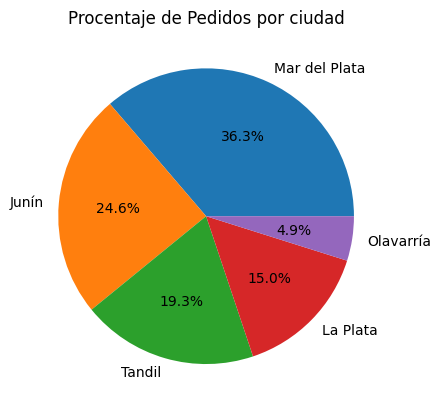

In [184]:
#Analisis de pedidos por ciudad
counts = df['Destino'].value_counts()
plt.pie(counts.values, labels = counts.index, autopct= '%1.1f%%')
plt.title(label = "Procentaje de Pedidos por ciudad")
plt.show()

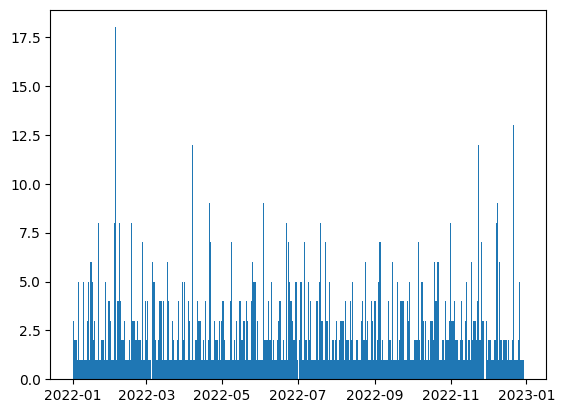

In [185]:
fecha = df['Fecha_Ingreso_Pedido']

plt.hist(fecha.values, bins = 365)
plt.show()


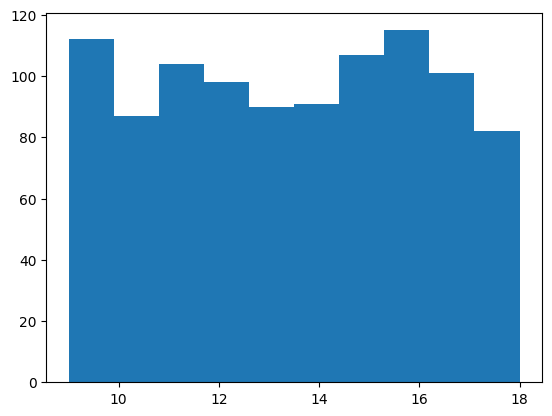

count    987.000000
mean      13.454914
std        2.867023
min        9.000000
25%       11.000000
50%       14.000000
75%       16.000000
max       18.000000
Name: Hora_Ingreso_Pedido, dtype: float64

In [186]:
#Hago un grafico para ver las distribucion por hora

plt.hist(df['Hora_Ingreso_Pedido'], bins = 10)
plt.show()
df['Hora_Ingreso_Pedido'].describe() #Rango de datos entre las 9-18hs ->POSIBLE HORARIO DE ATENCION

In [187]:
#Hora por dia de la semana



['LU', 'MA', 'MI', 'JU', 'VI', 'SA', 'DO']


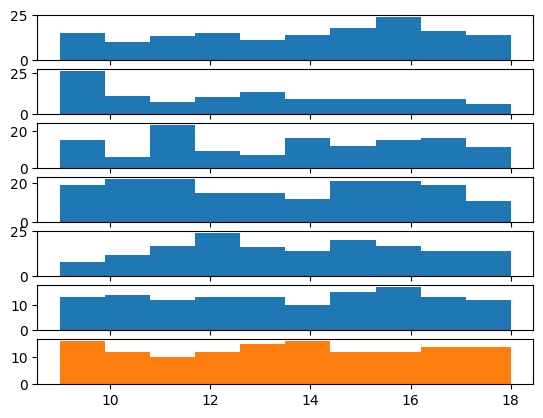

In [201]:
#Hago un histograma para ver como se ditribuyen los dias de pedido por ciudad (5GRAFICOS)
fig, ax =plt.subplots(7)

print(dias)
for dia in range(0,7):
    por_dia = df[df['Dia_Semana'] == dias[dia]]
    hora_por_dia = por_dia['Hora_Ingreso_Pedido']
    #print(hora_por_dia.values)
    ax[dia].hist(hora_por_dia.values)
    #ax[dia].title(dias[dia])


plt.hist(hora_por_dia)
plt.show()
